In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [3]:
# We will be downloading data from Yahoo Finance
# Use stock tickers with .NS or 
# to get the stock ticker of a stock search in Yahoo Finance 
# pip instal yfinance
import datetime as dt
import yfinance as yf

stock = 'POWERGRID.NS'

# Define a start date and End Date
start = dt.datetime(2011,1,1)
end =  dt.datetime(2023,3,1)

# Read Stock Price Data 
df = yf.download(stock, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-15,213.250000,215.199997,213.000000,214.500000,214.500000,6080623
2023-02-16,216.899994,216.899994,214.000000,214.600006,214.600006,2972337
2023-02-17,214.000000,215.899994,213.000000,213.800003,213.800003,4868362
2023-02-20,215.600006,217.000000,214.199997,215.800003,215.800003,5131438
2023-02-21,217.550003,218.750000,216.050003,217.199997,217.199997,5026076
2023-02-22,216.000000,217.300003,213.000000,214.649994,214.649994,6846495
2023-02-23,215.000000,215.899994,212.600006,213.250000,213.250000,7759406
2023-02-24,212.399994,215.399994,212.399994,215.050003,215.050003,7356623
2023-02-27,216.449997,219.949997,214.550003,219.199997,219.199997,13322714


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,73.837517,74.062515,73.387520,73.725021,48.192955,4264858
2011-01-04,73.837517,74.175018,73.312515,73.800018,48.241982,7409034
2011-01-05,73.800018,74.137520,73.275017,73.575020,48.094891,4918432
2011-01-06,73.650017,74.812515,73.350021,74.250015,48.536137,12687550
2011-01-07,74.250015,74.925018,72.862518,73.387520,47.972324,11831861
2011-01-10,73.350021,73.950020,71.962517,72.112518,47.138885,8810324
2011-01-11,72.600021,73.500015,71.400017,72.037521,47.089855,6302135
2011-01-12,72.525017,73.087517,71.625015,72.937515,47.678177,4017165
2011-01-13,72.900017,73.087517,72.337517,72.562515,47.433041,4380002


In [5]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,73.837517,74.062515,73.387520,73.725021,48.192955,4264858
1,2011-01-04,73.837517,74.175018,73.312515,73.800018,48.241982,7409034
2,2011-01-05,73.800018,74.137520,73.275017,73.575020,48.094891,4918432
3,2011-01-06,73.650017,74.812515,73.350021,74.250015,48.536137,12687550
4,2011-01-07,74.250015,74.925018,72.862518,73.387520,47.972324,11831861


In [7]:
# Candlesticks

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [8]:
df =df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,73.837517,74.062515,73.387520,73.725021,4264858
1,73.837517,74.175018,73.312515,73.800018,7409034
2,73.800018,74.137520,73.275017,73.575020,4918432
3,73.650017,74.812515,73.350021,74.250015,12687550
4,74.250015,74.925018,72.862518,73.387520,11831861


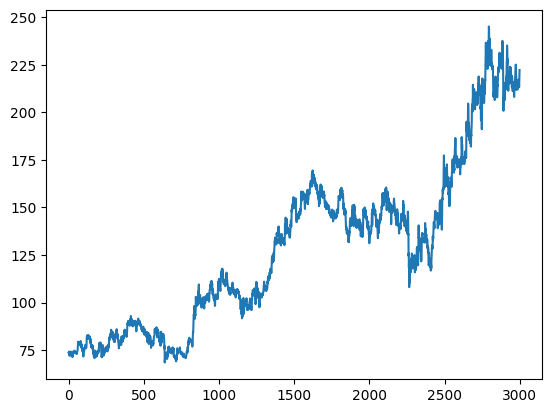

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2995    216.731501
2996    216.742001
2997    216.784501
2998    216.892001
2999    217.051501
Name: Close, Length: 3000, dtype: float64

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2995    219.010000
2996    218.858000
2997    218.737251
2998    218.653751
2999    218.583501
Name: Close, Length: 3000, dtype: float64

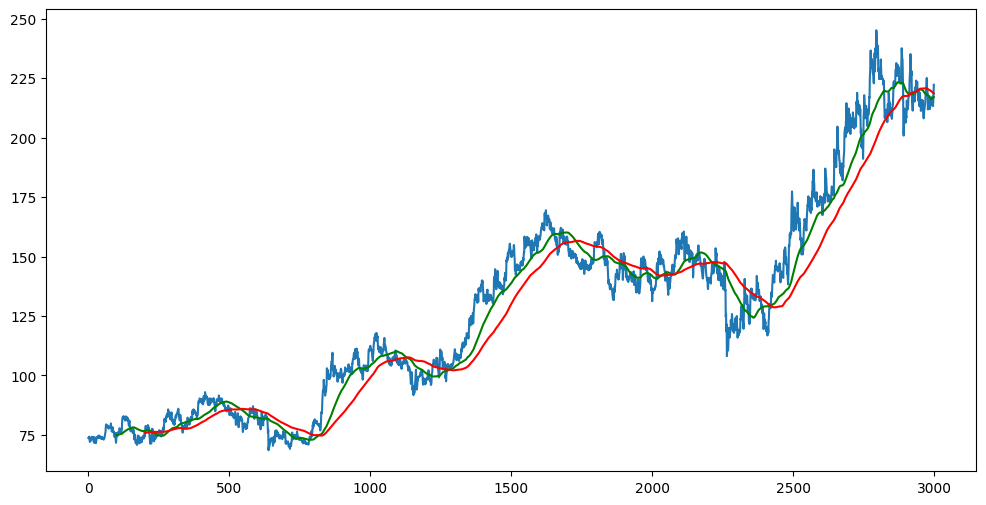

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [12]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()
ema100

0        73.725021
1        73.726506
2        73.723507
3        73.733933
4        73.727073
           ...    
2995    216.803505
2996    216.733139
2997    216.699809
2998    216.749318
2999    216.858242
Name: Close, Length: 3000, dtype: float64

In [13]:
ema200 = df.Close.ewm(span=200, adjust=False).mean()
ema200

0        73.725021
1        73.725768
2        73.724268
3        73.729499
4        73.726096
           ...    
2995    215.578889
2996    215.555716
2997    215.550684
2998    215.586995
2999    215.653294
Name: Close, Length: 3000, dtype: float64

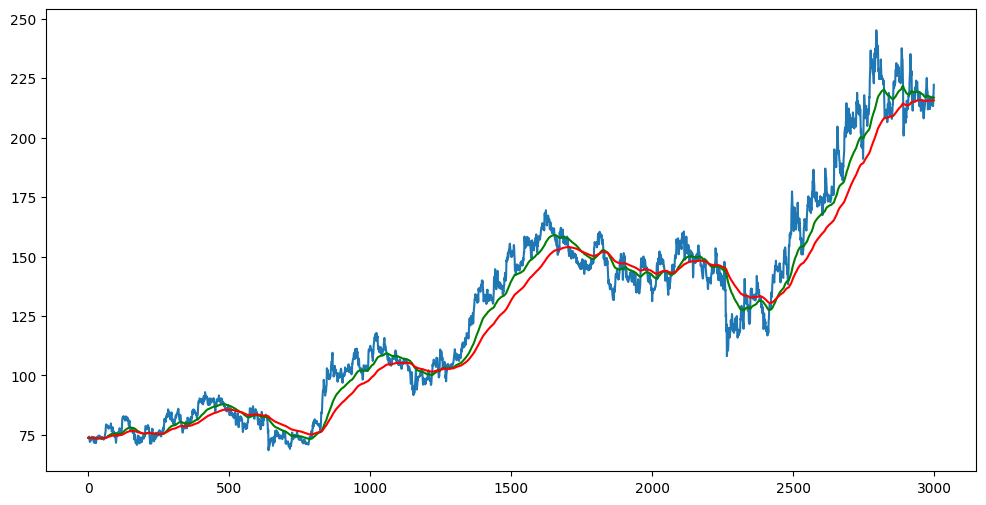

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ema100, 'g')
plt.plot(ema200, 'r')

In [16]:
df.shape

(3000, 5)

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2100, 1)
(900, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05163448],
       [0.05237739],
       [0.05014858],
       ...,
       [0.87109961],
       [0.85698368],
       [0.8439822 ]])

In [20]:
data_training_array.shape

(2100, 1)

In [21]:
x_train = []
y_train = []

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [22]:
x_train.shape

(2000, 100, 1)

In [23]:
y_train.shape

(2000,)

In [26]:
# Model building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


## Summary
### The input of the LSTM is always is a 3D array. (batch_size, time_steps, seq_len).
### The output of the LSTM could be a 2D array or 3D array depending upon the return_sequences argument.
### If return_sequence is False, the output is a 2D array. (batch_size, units)
### If return_sequence is True, the output is a 3D array. batch_size, time_steps, units)

In [27]:
model = Sequential()

model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 35s 218ms/step - loss: 0.0452
Epoch 2/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0098
Epoch 3/50
63/63 [==============================] - 10s 166ms/step - loss: 0.0096
Epoch 4/50
63/63 [==============================] - 12s 194ms/step - loss: 0.0092
Epoch 5/50
63/63 [==============================] - 12s 187ms/step - loss: 0.0079
Epoch 6/50
63/63 [==============================] - 11s 173ms/step - loss: 0.0074
Epoch 7/50
63/63 [==============================] - 11s 172ms/step - loss: 0.0070
Epoch 8/50
63/63 [==============================] - 11s 174ms/step - loss: 0.0062
Epoch 9/50
63/63 [==============================] - 11s 175ms/step - loss: 0.0063
Epoch 10/50
63/63 [==============================] - 11s 182ms/step - loss: 0.0064
Epoch 11/50
63/63 [==============================] - 12s 191ms/step - loss: 0.0054
Epoch 12/50
63/63 [==============================] - 12s 190ms/step - loss: 0.0058
Epoch 13/50
6

In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [32]:
input_data = scaler.fit_transform(final_df)

In [34]:
# like questions in exam
x_test=[]
# like model answer for teacher and he will compare it with students predicted values
y_test=[]

for i in range (100,input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test), np.array(y_test)

In [35]:
print(x_test.shape)
print(y_test.shape)

(900, 100, 1)
(900,)


In [36]:
y_predicted = model.predict(x_test)

29/29 [==============================] - 48s 104ms/step


In [37]:
y_predicted.shape

(900, 1)

In [38]:
# As of now all data are scaled so we have to un-scale them to understand properly
# First we have to know the factor by which the values are scaled
scaler.scale_

array([0.00729727])

In [39]:
scale_factor = 1/0.00729727
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

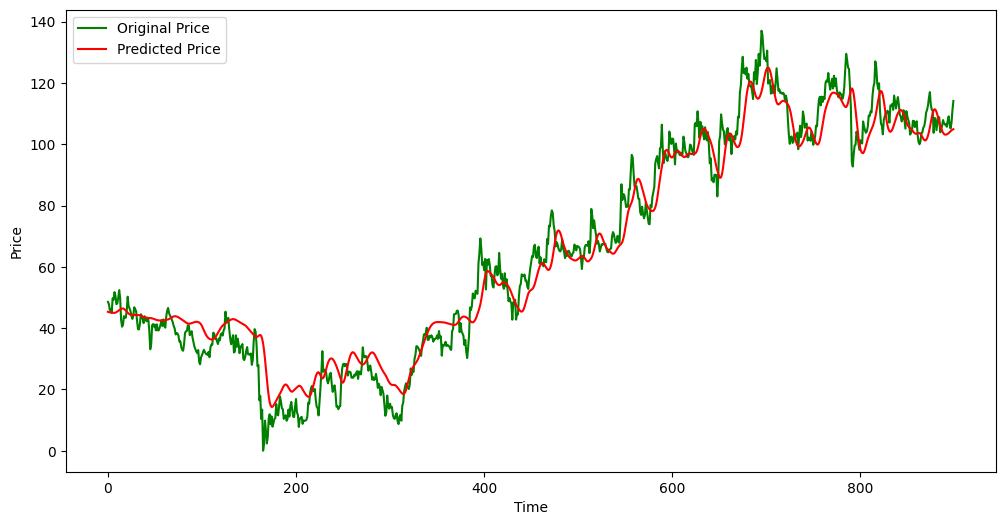

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
model.save('stock_dl_model.h5')